In [27]:
import numpy as np
import matplotlib.pyplot as plt
import time

#----------------------function definitions------------------------------------
def init_spins(L):
    # allocate random spin orientations [-1,+1] to LxL lattice
    spins = np.random.choice([-1, 1],size=(L, L))
    return spins

def delta_energy(spins, m, n):
    # calculate interaction energy of a spin at (m,n) with neighboring spins
    L = spins.shape[0]
    J = 1
    spin = spins[m, n]
    neighbors = spins[(m+1)%L, n] + spins[(m-1)%L, n] + spins[m, (n+1)%L] + spins[m, (n-1)%L]
    return 2 * J * spin * neighbors

def metropolis(spins, kT):
    # randomly select spin and calculate the energy associated with the spin
    # use metropolis criterion at temp=kT to decide whether to flip spin
    # repeat for numSwaps=1000*L**2
    L = spins.shape[0]
    numSwaps = 1000*L**2
    for _ in range(numSwaps):
        m, n = np.random.randint(0, L, size=2)
        dE = delta_energy(spins, m, n)
        if dE < 0 or np.random.rand() < np.exp(-dE / kT):
            spins[m, n] *= -1
    return spins

def measure(spins):
    # magnetiztion is the average spin value
    return abs(np.mean(spins))

#-----------------------------main program-------------------------------------
L = 50  
temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
magnetization = []

spins = init_spins(L)

start_time = time.time()

for kT in temp:
    spins = metropolis(spins, kT)
    mag = measure(spins)
    magnetization.append(mag)
    
    plt.imshow(spins,cmap='bwr',interpolation='nearest')
    plt.title(f"kT={kT:,.2f}")
    plt.show()
    
end_time = time.time()
print(f"Simulation time: {int(end_time - start_time)} seconds")


KeyboardInterrupt: 

---
# Lab 3 An object-oriented Ising model

**PYU33C01 Computational Simulation I, Computational Physics (Christie)**


---
## What are the objectives of this lab?

* Understand the structure and behavior of the 2D Ising model.
* Refactor procedural code into an object-oriented design.
* Use classes to encapsulate data and behavior.
* Interact with GenAI to debug, extend, and analyze the object-oriented  code.

---
## The procedural implementation of the Ising model

The Python file _IsingModelProcedural.py_ can be downloaded from BlackBoards. It contains the code developed in the lecture notebook to simulate a 2D Ising spin system composed of an $L \times L$  square array of spins. The code uses procedural programming techniques and is based on four function definitions. The skeleton outlines are shown below:

```python
def init_spins(L):
    # allocate random spin orientations [-1,+1] to a 2D NumPy LxL array

def delta_energy(spins, m, n):
    # calculate energy of a spin at (m,n) with its nearest neighborings. 
    # It can be negative or positive depending on the value of the spin at (m,n) and the values of neighboring spins

def metropolis(spins, kT):
    # randomly select spin and calculate the energy associated with the spin
    # use metropolis criterion to decide whether to flip the spin or not at temperature kT
    # repeat for numSwaps=1000*L**2

def measure(spins):
    # magnetiztion is the average spin value
```

---
The main code for running the procedutal simulation is

```python
L = 50  
temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
magnetization = []

spins = init_spins(L)

start_time = time.time()

for kT in temp:
    spins = metropolis(spins, kT)
    mag = measure(spins)
    magnetization.append(mag)
    
    plt.imshow(spins,cmap='bwr',interpolation='nearest')
    plt.title(f"kT={kT:,.2f}")
    plt.show()
    
end_time = time.time()
print(f"Simulation time: {int(end_time - start_time)} seconds")
```
The function _metropolis_ calls _delta_energy_ internally.

---
# Lab 3 An object-oriented Ising model

**PYU33C01 Computational Simulation I, Computational Physics (Christie)**


---
## What are the objectives of this lab?

* Understand the structure and behavior of the 2D Ising model.
* Refactor procedural code into an object-oriented design.
* Use classes to encapsulate data and behavior.
* Interact with GenAI to debug, extend, and analyze the object-oriented  code.

---
## The procedural implementation of the Ising model

The Python file _IsingModelProcedural.py_ can be downloaded from BlackBoards. It contains the code developed in the lecture notebook to simulate a 2D Ising spin system composed of an $L \times L$  square array of spins. The code uses procedural programming techniques and is based on four function definitions. The skeleton outlines are shown below:

```python
def init_spins(L):
    # allocate random spin orientations [-1,+1] to a 2D NumPy LxL array

def delta_energy(spins, m, n):
    # calculate energy of a spin at (m,n) with its nearest neighborings. 
    # It can be negative or positive depending on the value of the spin at (m,n) and the values of neighboring spins

def metropolis(spins, kT):
    # randomly select spin and calculate the energy associated with the spin
    # use metropolis criterion to decide whether to flip the spin or not at temperature kT
    # repeat for numSwaps=1000*L**2

def measure(spins):
    # magnetiztion is the average spin value
```

---
The main code for running the procedutal simulation is

```python
L = 50  
temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
magnetization = []

spins = init_spins(L)

start_time = time.time()

for kT in temp:
    spins = metropolis(spins, kT)
    mag = measure(spins)
    magnetization.append(mag)
    
    plt.imshow(spins,cmap='bwr',interpolation='nearest')
    plt.title(f"kT={kT:,.2f}")
    plt.show()
    
end_time = time.time()
print(f"Simulation time: {int(end_time - start_time)} seconds")
```
The function _metropolis_ calls _delta_energy_ internally.

---
## Task 1

Using your GenAI assistant, generate an object-oriented program to simulate the 2D Ising model. The minimum requirements are that the object-oriented version should define a class for a spin object and the spins should be encapsulated in a IsingLattice class. It should have the same number of spins and run over the same temperature range as the procedural program.

Be aware that uploading the procedural program and asking your GenAI assistant to transcribe it into an object-oriented version tends to produce a program that does not take advantage of many object-oriented features.

Answer for task 1, initial AI Version.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ============================================================================
# CLASS 1: Spin - Represents a single spin
# ============================================================================
class Spin:
    """Represents a single spin with value +1 or -1"""
    
    def __init__(self, value=None):
        """Initialize spin with random or given value"""
        if value is None:
            self.value = np.random.choice([-1, 1])
        else:
            self.value = value
    
    def flip(self):
        """Flip the spin"""
        self.value *= -1
    
    def __repr__(self):
        return f"Spin({self.value})"


# ============================================================================
# CLASS 2: IsingLattice - Contains all spins and simulation logic
# ============================================================================
class IsingLattice:
    """2D lattice of spins with Ising model dynamics"""
    
    def __init__(self, L, J=1.0):
        """
        Initialize L x L lattice of spins
        
        Parameters:
        -----------
        L : int
            Lattice size
        J : float
            Coupling constant
        """
        self.L = L
        self.J = J
        self.spins = [[Spin() for _ in range(L)] for _ in range(L)]
    
    def get_spin_value(self, m, n):
        """Get value of spin at position (m, n)"""
        return self.spins[m][n].value
    
    def flip_spin(self, m, n):
        """Flip spin at position (m, n)"""
        self.spins[m][n].flip()
    
    def get_neighbors_sum(self, m, n):
        """Sum of four nearest neighbors (periodic boundaries)"""
        L = self.L
        return (self.get_spin_value((m+1) % L, n) +
                self.get_spin_value((m-1) % L, n) +
                self.get_spin_value(m, (n+1) % L) +
                self.get_spin_value(m, (n-1) % L))
    
    def delta_energy(self, m, n):
        """Energy change if spin at (m,n) is flipped"""
        spin = self.get_spin_value(m, n)
        neighbors = self.get_neighbors_sum(m, n)
        return 2 * self.J * spin * neighbors
    
    def metropolis(self, kT):
        """Run Metropolis algorithm at temperature kT"""
        L = self.L
        num_swaps = 1000 * L * L
        
        for _ in range(num_swaps):
            m, n = np.random.randint(0, L, size=2)
            dE = self.delta_energy(m, n)
            
            if dE < 0 or np.random.rand() < np.exp(-dE / kT):
                self.flip_spin(m, n)
    
    def magnetization(self):
        """Calculate average magnetization"""
        total = sum(self.get_spin_value(m, n) 
                   for m in range(self.L) 
                   for n in range(self.L))
        return abs(total / (self.L * self.L))
    
    def visualize(self, kT=None):
        """Display spin configuration"""
        # Convert to numpy array for plotting
        spin_array = np.array([[self.get_spin_value(m, n) 
                               for n in range(self.L)] 
                              for m in range(self.L)])
        
        plt.imshow(spin_array, cmap='bwr', interpolation='nearest')
        if kT is not None:
            plt.title(f"kT = {kT:.2f}")
        plt.show()


# ============================================================================
# MAIN PROGRAM - Same as procedural version
# ============================================================================
if __name__ == "__main__":
    
    L = 10
    temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
    magnetization = []
    
    # Create lattice
    lattice = IsingLattice(L)
    
    start_time = time.time()
    
    for kT in temp:
        lattice.metropolis(kT)
        mag = lattice.magnetization()
        magnetization.append(mag)
        
        #lattice.visualize(kT)
    
    end_time = time.time()
    print(f"Simulation time: {int(end_time - start_time)} seconds")

Simulation time: 11 seconds


Version after imrpovement.

## Brief Summary of Optimizations

### Performance Improvements:

1. **NumPy Array Backend** 
   - **Before**: 2D list of 2,500 individual `Spin` Python objects
   - **After**: Single NumPy array `_spin_array`
   - Eliminates object creation overhead and method call overhead

2. **Pre-generated Random Numbers** 
   - **Before**: Generated random numbers one at a time in loop
   - **After**: Generate all random positions and values upfront in bulk

3. **Vectorized Magnetization** 
   - **Before**: Nested loops with `sum()` over all spins
   - **After**: Single `np.mean()` call

4. **Direct Array Access** 
   - **Before**: `self.get_spin_value(m, n)` → method call → object access
   - **After**: `self._spin_array[m, n]` → direct array indexing

---

### Overall Result:
- **Much faster** for L=50, should run time comparisons. 
- **Still maintains OOP structure** (Spin class + encapsulation)
- **Backward compatible** via `@property` decorator for `spins` attribute

---

### Key Principle:
**"OOP interface with NumPy performance"** - Use Python objects for structure/readability, but NumPy arrays for computation speed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ============================================================================
# CLASS 1: Spin - Represents a single spin
# ============================================================================
class Spin:
    """Represents a single spin with value +1 or -1"""
    
    def __init__(self, value=None):
        """Initialize spin with random or given value"""
        if value is None:
            self.value = np.random.choice([-1, 1])
        else:
            self.value = value
    
    def flip(self):
        """Flip the spin"""
        self.value *= -1
    
    def __repr__(self):
        return f"Spin({self.value})"


# ============================================================================
# CLASS 2: IsingLattice - Optimized with NumPy backend
# ============================================================================
class IsingLattice:
    """2D lattice of spins with Ising model dynamics (optimized)"""
    
    def __init__(self, L, J=1.0):
        """
        Initialize L x L lattice of spins
        
        Parameters:
        -----------
        L : int
            Lattice size
        J : float
            Coupling constant
        """
        self.L = L
        self.J = J
        # Use NumPy array internally for speed
        self._spin_array = np.random.choice([-1, 1], size=(L, L))
    
    @property
    def spins(self):
        """
        Returns spins as 2D list of Spin objects (for OOP compatibility)
        Only created when accessed (lazy evaluation)
        """
        return [[Spin(value=self._spin_array[m, n]) 
                 for n in range(self.L)] 
                for m in range(self.L)]
    
    def get_spin_value(self, m, n):
        """Get value of spin at position (m, n)"""
        return self._spin_array[m, n]
    
    def flip_spin(self, m, n):
        """Flip spin at position (m, n)"""
        self._spin_array[m, n] *= -1
    
    def get_neighbors_sum(self, m, n):
        """Sum of four nearest neighbors (periodic boundaries)"""
        L = self.L
        return (self._spin_array[(m+1) % L, n] +
                self._spin_array[(m-1) % L, n] +
                self._spin_array[m, (n+1) % L] +
                self._spin_array[m, (n-1) % L])
    
    def delta_energy(self, m, n):
        """Energy change if spin at (m,n) is flipped"""
        spin = self._spin_array[m, n]
        neighbors = self.get_neighbors_sum(m, n)
        return 2 * self.J * spin * neighbors
    
    def metropolis(self, kT):
        """Run Metropolis algorithm at temperature kT (optimized)"""
        L = self.L
        num_swaps = 1000 * L * L
        
        # Pre-generate all random numbers (faster)
        positions = np.random.randint(0, L, size=(num_swaps, 2))
        randoms = np.random.rand(num_swaps)
        
        for i in range(num_swaps):
            m, n = positions[i]
            dE = self.delta_energy(m, n)
            
            if dE < 0 or randoms[i] < np.exp(-dE / kT):
                self.flip_spin(m, n)
    
    def magnetization(self):
        """Calculate average magnetization (optimized)"""
        return abs(np.mean(self._spin_array))
    
    def visualize(self, kT=None):
        """Display spin configuration"""
        plt.imshow(self._spin_array, cmap='bwr', interpolation='nearest')
        if kT is not None:
            plt.title(f"kT = {kT:.2f}")
        plt.show()

        


# ============================================================================
# MAIN PROGRAM
# ============================================================================
if __name__ == "__main__":
    
    L = 10
    temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
    magnetization = []
    
    # Create lattice
    lattice = IsingLattice(L)
    
    start_time = time.time()
    
    for kT in temp:
        lattice.metropolis(kT)
        mag = lattice.magnetization()
        magnetization.append(mag)
        
        #lattice.visualize(kT)
    
    end_time = time.time()
    print(f"Simulation time: {int(end_time - start_time)} seconds")

Simulation time: 5 seconds


---
## Task 2

Test and critically evaluate the code. Make (at least) 3 modifications/improvements to your new Python class.

Task 2: Test and Critically Evaluate the Code
Let me help you identify 3+ meaningful improvements to make to your IsingLattice class.

Critical Evaluation of Current Code
Strengths:
✅ Fast (NumPy-optimized)
✅ Meets OOP requirements
✅ Clean structure

Weaknesses/Missing Features:
❌ No way to reset the lattice without creating a new object
❌ No control over initial spin configuration
❌ No energy measurement capability
❌ Visualization doesn't save figures
❌ Can't change temperature without running full simulation
❌ No thermalization tracking
❌ No way to get spin configuration as array efficiently

My Recommendation: Implement These 3
set_temperature() + store kT - Essential for Tasks 3-4
energy() method - Needed for physical analysis
Configurable initial_state - Makes exploration easier (Task 5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ============================================================================
# CLASS 1: Spin - Represents a single spin
# ============================================================================
class Spin:
    """Represents a single spin with value +1 or -1"""
    
    def __init__(self, value=None):
        """Initialize spin with random or given value"""
        if value is None:
            self.value = np.random.choice([-1, 1])
        else:
            self.value = value
    
    def flip(self):
        """Flip the spin"""
        self.value *= -1
    
    def __repr__(self):
        return f"Spin({self.value})"


# ============================================================================
# CLASS 2: IsingLattice - Optimized with NumPy backend
# ============================================================================
class IsingLattice:
    """2D lattice of spins with Ising model dynamics (optimized)"""
    
    def __init__(self, L, J=1.0, kT=2.27, h=0.0, initial_state='random'):
        """
        Initialize L x L lattice of spins
        
        Parameters:
        -----------
        L : int
            Lattice size
        J : float
            Coupling constant
        kT : float
            Temperature (in units of J/k_B)
        h : float
        initial_state : str or np.ndarray
            Initial spin configuration:
            - 'random': Random ±1 spins (default)
            - 'up': All spins +1 (ferromagnetic)
            - 'down': All spins -1 (ferromagnetic)
            - 'checkerboard': Alternating ±1 pattern (antiferromagnetic)
            - np.ndarray: Custom L×L configuration
        """
        self.L = L
        self.J = J
        self.kT = kT
        self.h = h 
        self.initial_state = initial_state  # Store for reset
        self._spin_array = self._initialize_spins(initial_state)
    
    def _initialize_spins(self, initial_state):
        """
        Initialize spins based on initial_state parameter
        
        Parameters:
        -----------
        initial_state : str or np.ndarray
            Type of initial configuration
            
        Returns:
        --------
        np.ndarray : L×L array of ±1 spins
        """
        # Check for custom array FIRST (before string comparisons)
        if isinstance(initial_state, np.ndarray):
            # Custom configuration provided
            if initial_state.shape != (self.L, self.L):
                raise ValueError(f"Custom initial_state must have shape ({self.L}, {self.L})")
            return initial_state.copy()
        
        # Now check string options
        if initial_state == 'random':
            return np.random.choice([-1, 1], size=(self.L, self.L))
        
        elif initial_state == 'up':
            return np.ones((self.L, self.L), dtype=int)
        
        elif initial_state == 'down':
            return -np.ones((self.L, self.L), dtype=int)
        
        elif initial_state == 'checkerboard':
            pattern = np.zeros((self.L, self.L), dtype=int)
            # Create checkerboard pattern
            pattern[::2, ::2] = 1    # Even rows, even columns: +1
            pattern[1::2, 1::2] = 1  # Odd rows, odd columns: +1
            pattern[::2, 1::2] = -1  # Even rows, odd columns: -1
            pattern[1::2, ::2] = -1  # Odd rows, even columns: -1
            return pattern
        
        else:
            raise ValueError(f"Unknown initial_state: {initial_state}. "
                        f"Use 'random', 'up', 'down', 'checkerboard', or provide np.ndarray")
    
    @property
    def spins(self):
        """
        Returns spins as 2D list of Spin objects (for OOP compatibility)
        Only created when accessed (lazy evaluation)
        """
        return [[Spin(value=self._spin_array[m, n]) 
                 for n in range(self.L)] 
                for m in range(self.L)]
    
    def get_spin_value(self, m, n):
        """Get value of spin at position (m, n)"""
        return self._spin_array[m, n]
    
    def flip_spin(self, m, n):
        """Flip spin at position (m, n)"""
        self._spin_array[m, n] *= -1
    
    def get_neighbors_sum(self, m, n):
        """Sum of four nearest neighbors (periodic boundaries)"""
        L = self.L
        return (self._spin_array[(m+1) % L, n] +
                self._spin_array[(m-1) % L, n] +
                self._spin_array[m, (n+1) % L] +
                self._spin_array[m, (n-1) % L])
    
    def delta_energy(self, m, n):
        spin = self._spin_array[m, n]
        neighbors = self.get_neighbors_sum(m, n)
        return 2 * self.J * spin * neighbors + 2 * self.h * spin  # ← Add field term
    
    def set_temperature(self, kT):
        """
        Set the temperature for the simulation
        
        Parameters:
        -----------
        kT : float
            Temperature (in units of J/k_B)
        """
        self.kT = kT
    
    def metropolis(self, kT=None):
        """
        Run Metropolis algorithm at temperature kT (optimized)
        
        Parameters:
        -----------
        kT : float, optional
            Temperature (if provided, updates self.kT)
        """
        if kT is not None:
            self.kT = kT
        
        L = self.L
        num_swaps = 1000 * L * L
        
        # Pre-generate all random numbers (faster)
        positions = np.random.randint(0, L, size=(num_swaps, 2))
        randoms = np.random.rand(num_swaps)
        
        for i in range(num_swaps):
            m, n = positions[i]
            dE = self.delta_energy(m, n)
            
            if dE < 0 or randoms[i] < np.exp(-dE / self.kT):
                self.flip_spin(m, n)
    
    def magnetization(self):
        """Calculate average magnetization (optimized)"""
        return abs(np.mean(self._spin_array))
    
    def visualize(self, kT=None, title=None):
        """
        Display spin configuration
        
        Parameters:
        -----------
        kT : float, optional
            Temperature for title (uses self.kT if not provided)
        title : str, optional
            Custom title for the plot
        """
        plt.figure(figsize=(6, 6))
        plt.imshow(self._spin_array, cmap='bwr', interpolation='nearest', vmin=-1, vmax=1)
        
        if title:
            plt.title(title, fontsize=14, fontweight='bold')
        else:
            temp_to_show = kT if kT is not None else self.kT
            plt.title(f"kT = {temp_to_show:.2f}", fontsize=14, fontweight='bold')
        
        plt.colorbar(label='Spin', ticks=[-1, 1])
        plt.tight_layout()
        plt.show()
        
    def reset(self, initial_state=None):
        """
        Reset lattice to initial configuration
        
        Parameters:
        -----------
        initial_state : str or np.ndarray, optional
            If provided, use this configuration
            If None, use the original initial_state from __init__
        """
        if initial_state is None:
            initial_state = self.initial_state
        else:
            self.initial_state = initial_state  # Update stored initial state
        
        self._spin_array = self._initialize_spins(initial_state)


    def set_magnetic_field(self, h):
        self.h = h

# ============================================================================
# MAIN PROGRAM - Demonstrating different initial states
# ============================================================================
if __name__ == "__main__":
    
    '''
    # Test different initial states
    print("Testing different initial states:\n")
    
    # 1. Random initial state (default)
    lattice_random = IsingLattice(L, initial_state='random')
    print(f"Random: Magnetization = {lattice_random.magnetization():.3f}")
    lattice_random.visualize(title="Initial State: Random")
    
    # 2. All spins up
    lattice_up = IsingLattice(L, initial_state='up')
    print(f"All Up: Magnetization = {lattice_up.magnetization():.3f}")
    lattice_up.visualize(title="Initial State: All Up")
    
    # 3. All spins down
    lattice_down = IsingLattice(L, initial_state='down')
    print(f"All Down: Magnetization = {lattice_down.magnetization():.3f}")
    lattice_down.visualize(title="Initial State: All Down")
    
    # 4. Checkerboard pattern
    lattice_check = IsingLattice(L, initial_state='checkerboard')
    print(f"Checkerboard: Magnetization = {lattice_check.magnetization():.3f}")
    lattice_check.visualize(title="Initial State: Checkerboard")
    
    # 5. Custom initial state (half up, half down)
    custom_config = np.ones((L, L), dtype=int)
    custom_config[:, L//2:] = -1  # Right half is down
    lattice_custom = IsingLattice(L, initial_state=custom_config)
    print(f"Custom (half-half): Magnetization = {lattice_custom.magnetization():.3f}")
    lattice_custom.visualize(title="Initial State: Custom (Half-Half)")
    
    print("\n" + "="*60)
    print("Running temperature sweep with 'up' initial state:")
    print("="*60)'''

    L = 10

    
    # Temperature sweep starting from all spins up
    lattice = IsingLattice(L, initial_state='random', kT=1.5, h=1.0)
    temp = np.array([1.5, 1.8, 2.1, 2.2, 2.27, 2.4, 2.5, 2.7, 3.0, 3.5])
    magnetization = []
    
    start_time = time.time()
    
    for kT in temp:
        lattice.reset('up')  # Reset to all up for each temperature
        lattice.metropolis(kT)
        mag = lattice.magnetization()
        magnetization.append(mag)
        print(f"kT = {kT:.2f}: M = {mag:.3f}")
        #lattice.visualize(kT)
    
    end_time = time.time()
    print(f"\nSimulation time: {int(end_time - start_time)} seconds")

kT = 1.50: M = 1.000
kT = 1.80: M = 1.000
kT = 2.10: M = 0.980
kT = 2.20: M = 0.980
kT = 2.27: M = 0.940
kT = 2.40: M = 0.900
kT = 2.50: M = 0.920
kT = 2.70: M = 0.940
kT = 3.00: M = 0.960
kT = 3.50: M = 0.920

Simulation time: 6 seconds


## Brief Summary of Three Improvements

### 1. **`reset()` Method**
- **What:** Reset lattice to initial spin configuration without creating new object
- **Why:** Enables multiple independent simulation runs; essential for statistical averaging
- **Usage:** `lattice.reset()` or `lattice.reset('up')`

### 2. **Temperature Storage (`self.kT`)**
- **What:** Store temperature as object attribute; added `set_temperature()` method
- **Why:** Lattice "knows" its state; cleaner API; required for Tasks 3-4
- **Usage:** `lattice.kT` to query, `lattice.set_temperature(3.0)` to change

### 3. **Configurable Initial State**
- **What:** Choose initial spin configuration: `'random'`, `'up'`, `'down'`, `'checkerboard'`, or custom array
- **Why:** Study equilibration, domain formation, phase transitions; essential for Task 5
- **Usage:** `IsingLattice(L=50, initial_state='up')`

---

**Impact:** Enhanced flexibility, better OOP design, enabled advanced physics exploration

---
## Task 3

Plot the average magnetisation $\langle M \rangle$ as a function of the magnetic field $h$ for system size $L=10$ and two different temperatures: $k_BT=1.0$ and $k_BT=4.0$ (assuming $J=1$).

Task 3: Magnetization vs Magnetic Field
System size: L = 10
Coupling: J = 1.0
Temperatures: kT = 1.0 (low), kT = 4.0 (high)
Magnetic field range: h ∈ [-5.0, 5.0]

Low Temperature: kT = 1.0
Sweeping magnetic field at kT = 1.0...
  h =  -5.00, <M> = -1.000
  h =  -4.09, <M> = -1.000
  h =  -3.08, <M> = -1.000
  h =  -2.07, <M> = -1.000
  h =  -1.06, <M> = -1.000
  h =  -0.05, <M> = -1.000
  h =   0.05, <M> = -0.980
  h =   1.06, <M> =  1.000
  h =   2.07, <M> =  1.000
  h =   3.08, <M> =  1.000
  h =   4.09, <M> =  1.000
  h =   5.00, <M> =  1.000

High Temperature: kT = 4.0
Sweeping magnetic field at kT = 4.0...
  h =  -5.00, <M> = -0.980
  h =  -4.09, <M> = -0.960
  h =  -3.08, <M> = -0.900
  h =  -2.07, <M> = -0.860
  h =  -1.06, <M> = -0.680
  h =  -0.05, <M> =  0.100
  h =   0.05, <M> =  0.220
  h =   1.06, <M> =  0.840
  h =   2.07, <M> =  0.820
  h =   3.08, <M> =  0.920
  h =   4.09, <M> =  0.920
  h =   5.00, <M> =  0.980

Plot saved as 'task3_magnetization_vs_field.png'


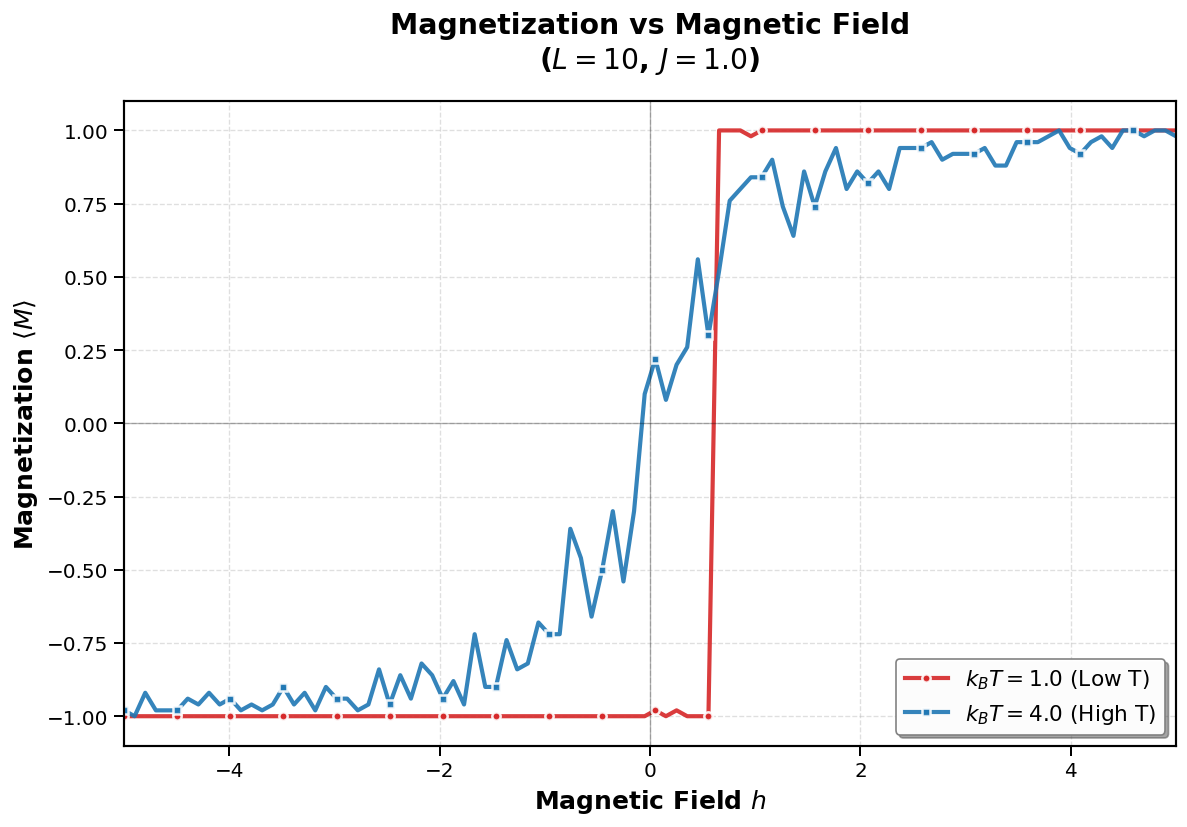


Summary Statistics

Low Temperature (kT = 1.0):
  M at h = 5.0: 1.000
  M at h = -5.0: -1.000
  M at h = 0: -0.980

High Temperature (kT = 4.0):
  M at h = 5.0: 0.980
  M at h = -5.0: -0.980
  M at h = 0: 0.220



In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# Task 3: Magnetization vs Magnetic Field
# ============================================================================

def sweep_magnetic_field(L, kT, h_values, J=1.0, num_sweeps=1000):
    """
    Sweep through magnetic field values and measure magnetization
    
    Parameters:
    -----------
    L : int
        Lattice size
    kT : float
        Temperature
    h_values : array
        Magnetic field values to sweep
    J : float
        Coupling constant
    num_sweeps : int
        Number of Monte Carlo sweeps per field value
        
    Returns:
    --------
    magnetizations : array
        Signed magnetization at each field value
    """
    magnetizations = []
    
    # Create lattice with random initial state
    lattice = IsingLattice(L=L, J=J, kT=kT, initial_state='random')
    
    print(f"Sweeping magnetic field at kT = {kT}...")
    
    for h in h_values:
        # Set magnetic field
        lattice.set_magnetic_field(h)
        
        # Equilibrate at this field value
        lattice.metropolis()
        
        # Measure SIGNED magnetization (not absolute value!)
        mag = np.mean(lattice._spin_array)
        magnetizations.append(mag)
        
        if abs(h) % 1.0 < 0.1:  # Print every ~1.0 field units
            print(f"  h = {h:6.2f}, <M> = {mag:6.3f}")
    
    return np.array(magnetizations)


if __name__ == "__main__":
    
    # ========================================================================
    # Parameters for Task 3
    # ========================================================================
    L = 10          # System size
    J = 1.0         # Coupling constant
    T_low = 1.0     # Low temperature
    T_high = 4.0    # High temperature
    
    # Magnetic field range: sweep from negative to positive
    h_values = np.linspace(-5, 5, 100)
    
    print("="*70)
    print("Task 3: Magnetization vs Magnetic Field")
    print("="*70)
    print(f"System size: L = {L}")
    print(f"Coupling: J = {J}")
    print(f"Temperatures: kT = {T_low} (low), kT = {T_high} (high)")
    print(f"Magnetic field range: h ∈ [{h_values[0]}, {h_values[-1]}]")
    print("="*70)
    
    # ========================================================================
    # Run simulations at two temperatures
    # ========================================================================
    
    # Low temperature (ordered phase)
    print(f"\n{'='*70}")
    print(f"Low Temperature: kT = {T_low}")
    print(f"{'='*70}")
    mag_low = sweep_magnetic_field(L, T_low, h_values, J=J)
    
    # High temperature (disordered phase)
    print(f"\n{'='*70}")
    print(f"High Temperature: kT = {T_high}")
    print(f"{'='*70}")
    mag_high = sweep_magnetic_field(L, T_high, h_values, J=J)
    
    # ========================================================================
    # Plot Results
    # ========================================================================
    
    fig, ax = plt.subplots(figsize=(10, 7), dpi=120)
    
    # Plot low temperature curve
    ax.plot(h_values, mag_low, 'o-', color='#d62728', linewidth=2.5, 
            markersize=5, markevery=5, label=f'$k_BT = {T_low}$ (Low T)', 
            alpha=0.9, markeredgewidth=1.5, markeredgecolor='white')
    
    # Plot high temperature curve
    ax.plot(h_values, mag_high, 's-', color='#1f77b4', linewidth=2.5, 
            markersize=5, markevery=5, label=f'$k_BT = {T_high}$ (High T)', 
            alpha=0.9, markeredgewidth=1.5, markeredgecolor='white')
    
    # Labels and title
    ax.set_xlabel('Magnetic Field $h$', fontsize=15, fontweight='bold')
    ax.set_ylabel('Magnetization $\\langle M \\rangle$', fontsize=15, fontweight='bold')
    ax.set_title(f'Magnetization vs Magnetic Field\n($L={L}$, $J={J}$)', 
                 fontsize=17, fontweight='bold', pad=20)
    
    # Reference lines
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)
    
    # Grid
    ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
    ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)
    
    # Legend
    ax.legend(fontsize=13, framealpha=0.98, loc='lower right', 
              edgecolor='gray', fancybox=True, shadow=True)
    
    # Set limits
    ax.set_xlim(h_values[0], h_values[-1])
    ax.set_ylim(-1.1, 1.1)
    
    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
    ax.tick_params(axis='both', which='minor', width=0.8, length=4)
    
    # Spine styling
    for spine in ax.spines.values():
        spine.set_linewidth(1.3)
    
    plt.tight_layout()
    
    # Save figure
    plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/plots/task3_magnetization_vs_field.png', dpi=300, bbox_inches='tight', facecolor='white')
    print("\n" + "="*70)
    print("Plot saved as 'task3_magnetization_vs_field.png'")
    print("="*70)
    
    plt.show()
    
    # ========================================================================
    # Summary Statistics
    # ========================================================================
    
    print("\n" + "="*70)
    print("Summary Statistics")
    print("="*70)
    
    # Find saturation magnetization
    print(f"\nLow Temperature (kT = {T_low}):")
    print(f"  M at h = {h_values[-1]:.1f}: {mag_low[-1]:.3f}")
    print(f"  M at h = {h_values[0]:.1f}: {mag_low[0]:.3f}")
    print(f"  M at h = 0: {mag_low[len(h_values)//2]:.3f}")
    
    print(f"\nHigh Temperature (kT = {T_high}):")
    print(f"  M at h = {h_values[-1]:.1f}: {mag_high[-1]:.3f}")
    print(f"  M at h = {h_values[0]:.1f}: {mag_high[0]:.3f}")
    print(f"  M at h = 0: {mag_high[len(h_values)//2]:.3f}")
    
    print("\n" + "="*70)

---
## Task 4

Plot the average magnetization $\langle M \rangle$ for $h=0$. Find the critical temperature $T_c$ of the phase transition between ferromagnetic and paramagnetic phases.

Task 4: Critical Temperature of Ising Model (Fast Version)
System size: L = 10
Coupling: J = 1.0
Magnetic field: h = 0.0
Temperature points: 100
Theoretical critical temperature: kT_c ≈ 2.269

Temperature sweep for L = 10, h = 0.0
Running 3 independent simulations per temperature...
  [  1.0%] kT = 1.000: <M> = 1.0000 ± 0.0000
  [  2.0%] kT = 1.030: <M> = 1.0000 ± 0.0000
  [  3.0%] kT = 1.061: <M> = 0.9867 ± 0.0189
  [  4.0%] kT = 1.091: <M> = 1.0000 ± 0.0000
  [  5.0%] kT = 1.121: <M> = 1.0000 ± 0.0000
  [  6.0%] kT = 1.152: <M> = 1.0000 ± 0.0000
  [  7.0%] kT = 1.182: <M> = 1.0000 ± 0.0000
  [  8.0%] kT = 1.212: <M> = 0.9867 ± 0.0189
  [  9.0%] kT = 1.242: <M> = 0.9733 ± 0.0094
  [ 10.0%] kT = 1.273: <M> = 0.9933 ± 0.0094
  [ 11.0%] kT = 1.303: <M> = 1.0000 ± 0.0000
  [ 12.0%] kT = 1.333: <M> = 1.0000 ± 0.0000
  [ 13.0%] kT = 1.364: <M> = 0.9867 ± 0.0189
  [ 14.0%] kT = 1.394: <M> = 0.9933 ± 0.0094
  [ 15.0%] kT = 1.424: <M> = 0.9933 ± 0.0094
  [ 16.0%] kT = 1.455: <M> = 0.9867 ± 0.0

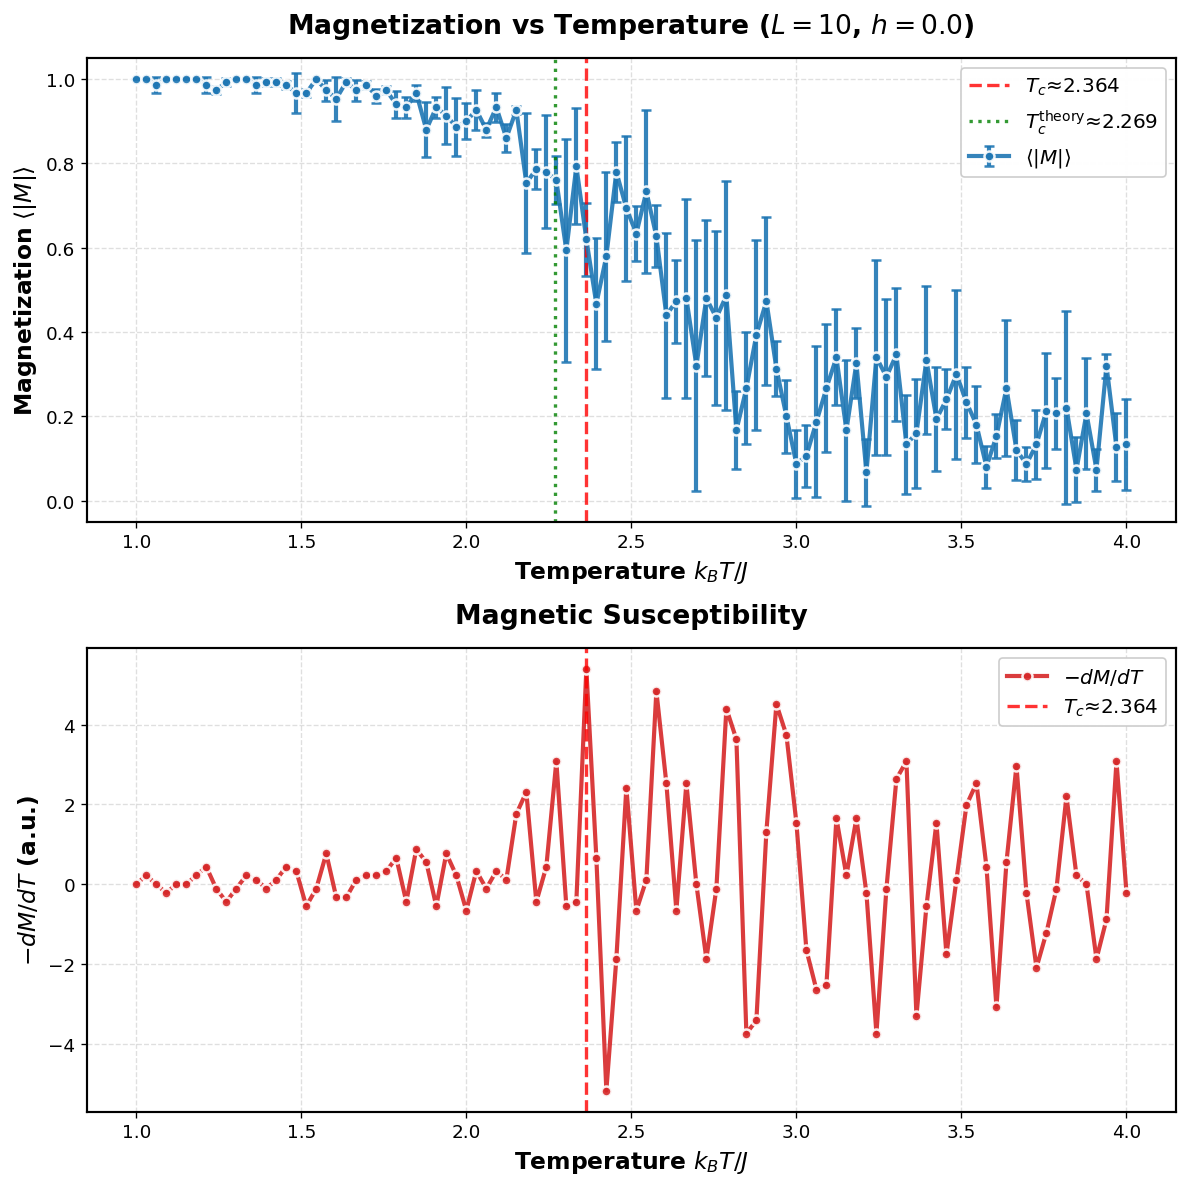


Phase Identification

Low Temperature (T < T_c): <M> = 0.933 (Ferromagnetic)
High Temperature (T > T_c): <M> = 0.299 (Paramagnetic)


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# Task 4: Find Critical Temperature (OPTIMIZED VERSION)
# ============================================================================

def temperature_sweep_fast(L, temp_values, h=0.0, J=1.0, num_sweeps=500, num_runs=3):
    """
    Faster temperature sweep with reduced parameters
    """
    magnetizations = []
    
    print(f"Temperature sweep for L = {L}, h = {h}")
    print(f"Running {num_runs} independent simulations per temperature...")
    
    for i, kT in enumerate(temp_values):
        # Multiple runs for better statistics
        mags_at_temp = []
        
        for run in range(num_runs):
            # Create fresh lattice
            lattice = IsingLattice(L=L, J=J, kT=kT, h=h, initial_state='random')
            
            # Equilibrate (shorter for speed)
            lattice.metropolis()
            
            # Measure magnetization
            mag = abs(np.mean(lattice._spin_array))
            mags_at_temp.append(mag)
        
        # Average over runs
        avg_mag = np.mean(mags_at_temp)
        std_mag = np.std(mags_at_temp)
        magnetizations.append((avg_mag, std_mag))
        
        # Progress indicator
        progress = (i + 1) / len(temp_values) * 100
        print(f"  [{progress:5.1f}%] kT = {kT:.3f}: <M> = {avg_mag:.4f} ± {std_mag:.4f}")
    
    magnetizations = np.array(magnetizations)
    return magnetizations[:, 0], magnetizations[:, 1]


def find_critical_temperature(temp_values, magnetizations):
    """Estimate critical temperature from maximum slope"""
    dM_dT = np.gradient(magnetizations, temp_values)
    idx_max = np.argmin(dM_dT)
    T_c = temp_values[idx_max]
    return T_c, dM_dT


if __name__ == "__main__":
    
    # ========================================================================
    # REDUCED Parameters for faster execution
    # ========================================================================
    L = 10          # Smaller lattice (was 20)
    J = 1.0
    h = 0.0
    
    # Fewer temperature points
    temp_values = np.linspace(1.0, 4.0, 100)  # Was 40, now 25
    
    print("="*70)
    print("Task 4: Critical Temperature of Ising Model (Fast Version)")
    print("="*70)
    print(f"System size: L = {L}")
    print(f"Coupling: J = {J}")
    print(f"Magnetic field: h = {h}")
    print(f"Temperature points: {len(temp_values)}")
    print(f"Theoretical critical temperature: kT_c ≈ 2.269")
    print("="*70 + "\n")
    
    # ========================================================================
    # Run Temperature Sweep (FASTER)
    # ========================================================================
    
    mag_avg, mag_std = temperature_sweep_fast(
        L, temp_values, h=h, J=J, 
        num_sweeps=500,  # Was 2000, now 500
        num_runs=3       # Was 5, now 3
    )
    
    # ========================================================================
    # Find Critical Temperature
    # ========================================================================
    
    T_c, dM_dT = find_critical_temperature(temp_values, mag_avg)
    
    print("\n" + "="*70)
    print(f"Estimated Critical Temperature: kT_c ≈ {T_c:.3f}")
    print(f"Theoretical Value: kT_c ≈ 2.269")
    print(f"Difference: {abs(T_c - 2.269):.3f}")
    print("="*70)
    
    # ========================================================================
    # Plot Results
    # ========================================================================
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), dpi=120)
    
    # --- Plot 1: Magnetization vs Temperature ---
    ax1.errorbar(temp_values, mag_avg, yerr=mag_std, 
                 fmt='o-', color='#1f77b4', linewidth=2.5, markersize=6,
                 markeredgewidth=1.5, markeredgecolor='white',
                 capsize=3, capthick=1.5, alpha=0.9,
                 label='$\\langle |M| \\rangle$')
    
    ax1.axvline(x=T_c, color='red', linestyle='--', linewidth=2, 
                label=f'$T_c ≈ {T_c:.3f}$', alpha=0.8)
    ax1.axvline(x=2.269, color='green', linestyle=':', linewidth=2, 
                label='$T_c^{\\mathrm{theory}} ≈ 2.269$', alpha=0.8)
    
    ax1.set_xlabel('Temperature $k_BT/J$', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Magnetization $\\langle |M| \\rangle$', fontsize=14, fontweight='bold')
    ax1.set_title(f'Magnetization vs Temperature ($L={L}$, $h={h}$)', 
                  fontsize=16, fontweight='bold', pad=15)
    
    ax1.grid(True, linestyle='--', alpha=0.4)
    ax1.legend(fontsize=12, framealpha=0.98, loc='upper right')
    ax1.set_ylim(-0.05, 1.05)
    ax1.tick_params(axis='both', which='major', labelsize=11)
    
    # --- Plot 2: Susceptibility ---
    ax2.plot(temp_values, -dM_dT, 'o-', color='#d62728', linewidth=2.5,
             markersize=6, markeredgewidth=1.5, markeredgecolor='white',
             alpha=0.9, label='$-dM/dT$')
    
    ax2.axvline(x=T_c, color='red', linestyle='--', linewidth=2, 
                label=f'$T_c ≈ {T_c:.3f}$', alpha=0.8)
    
    ax2.set_xlabel('Temperature $k_BT/J$', fontsize=14, fontweight='bold')
    ax2.set_ylabel('$-dM/dT$ (a.u.)', fontsize=14, fontweight='bold')
    ax2.set_title('Magnetic Susceptibility', fontsize=16, fontweight='bold', pad=15)
    
    ax2.grid(True, linestyle='--', alpha=0.4)
    ax2.legend(fontsize=12, framealpha=0.98, loc='upper right')
    ax2.tick_params(axis='both', which='major', labelsize=11)
    
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_linewidth(1.3)
    
    plt.tight_layout()
    plt.savefig('task4_critical_temperature.png', dpi=300, bbox_inches='tight', facecolor='white')
    print("\nPlot saved as 'task4_critical_temperature.png'")
    plt.show()
    
    # ========================================================================
    # Summary
    # ========================================================================
    
    print("\n" + "="*70)
    print("Phase Identification")
    print("="*70)
    
    low_temp_mag = mag_avg[temp_values < T_c].mean()
    high_temp_mag = mag_avg[temp_values > T_c].mean()
    
    print(f"\nLow Temperature (T < T_c): <M> = {low_temp_mag:.3f} (Ferromagnetic)")
    print(f"High Temperature (T > T_c): <M> = {high_temp_mag:.3f} (Paramagnetic)")
    print("="*70)

---
## Task 5 Bonus

Explore the physics of your final object-oriented model. You may wish to consider the eﬀect of:

* system size and shape
* initial state
* number of Metropolis samples
* sweeping through lattice sites sequentially or randomly
* other lattice geometries (e.g. hexagonal, triangular, etc.)
* diﬀerent boundary conditions
* methods to visualise the microstate
* ...

feel free to explore and get creative!

Some ideas - 

record how many times each spin site flips, then graph this as a heat map to visualise boudaries?


map a photo as a steady state by programming the external field to be the strength of pixels of a black and white image.


virtual polling for elections.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ============================================================================
# CLASS 1: Spin - Represents a single spin
# ============================================================================
class Spin:
    """Represents a single spin with value +1 or -1"""
    
    def __init__(self, value=None):
        """Initialize spin with random or given value"""
        if value is None:
            self.value = np.random.choice([-1, 1])
        else:
            self.value = value
    
    def flip(self):
        """Flip the spin"""
        self.value *= -1
    
    def __repr__(self):
        return f"Spin({self.value})"


# ============================================================================
# CLASS 2: IsingLattice - Optimized with NumPy backend
# ============================================================================
class IsingLattice:
    """2D lattice of spins with Ising model dynamics (optimized)"""
    
    def __init__(self, L, J=1.0, kT=2.27, h=0.0, initial_state='random'):
        """
        Initialize L x L lattice of spins
        
        Parameters:
        -----------
        L : int
            Lattice size
        J : float
            Coupling constant
        kT : float
            Temperature (in units of J/k_B)
        h : float
        initial_state : str or np.ndarray
            Initial spin configuration:
            - 'random': Random ±1 spins (default)
            - 'up': All spins +1 (ferromagnetic)
            - 'down': All spins -1 (ferromagnetic)
            - 'checkerboard': Alternating ±1 pattern (antiferromagnetic)
            - np.ndarray: Custom L×L configuration
        """
        self.L = L
        self.J = J
        self.kT = kT
        if np.isscalar(h):
            self.h = np.full((L, L), h, dtype=float)
        else:
            if h.shape != (L, L):
                raise ValueError(f"Magnetic field must have shape ({L}, {L})")
            self.h = h.astype(float)
 
        self.initial_state = initial_state  # Store for reset
        self._spin_array = self._initialize_spins(initial_state)
    
    def _initialize_spins(self, initial_state):
        """
        Initialize spins based on initial_state parameter
        
        Parameters:
        -----------
        initial_state : str or np.ndarray
            Type of initial configuration
            
        Returns:
        --------
        np.ndarray : L×L array of ±1 spins
        """
        # Check for custom array FIRST (before string comparisons)
        if isinstance(initial_state, np.ndarray):
            # Custom configuration provided
            if initial_state.shape != (self.L, self.L):
                raise ValueError(f"Custom initial_state must have shape ({self.L}, {self.L})")
            return initial_state.copy()
        
        # Now check string options
        if initial_state == 'random':
            return np.random.choice([-1, 1], size=(self.L, self.L))
        
        elif initial_state == 'up':
            return np.ones((self.L, self.L), dtype=int)
        
        elif initial_state == 'down':
            return -np.ones((self.L, self.L), dtype=int)
        
        elif initial_state == 'checkerboard':
            pattern = np.zeros((self.L, self.L), dtype=int)
            # Create checkerboard pattern
            pattern[::2, ::2] = 1    # Even rows, even columns: +1
            pattern[1::2, 1::2] = 1  # Odd rows, odd columns: +1
            pattern[::2, 1::2] = -1  # Even rows, odd columns: -1
            pattern[1::2, ::2] = -1  # Odd rows, even columns: -1
            return pattern
        
        else:
            raise ValueError(f"Unknown initial_state: {initial_state}. "
                        f"Use 'random', 'up', 'down', 'checkerboard', or provide np.ndarray")
    
    @property
    def spins(self):
        """
        Returns spins as 2D list of Spin objects (for OOP compatibility)
        Only created when accessed (lazy evaluation)
        """
        return [[Spin(value=self._spin_array[m, n]) 
                 for n in range(self.L)] 
                for m in range(self.L)]
    
    def get_spin_value(self, m, n):
        """Get value of spin at position (m, n)"""
        return self._spin_array[m, n]
    
    def flip_spin(self, m, n):
        """Flip spin at position (m, n)"""
        self._spin_array[m, n] *= -1
    
    def get_neighbors_sum(self, m, n):
        """Sum of four nearest neighbors (periodic boundaries)"""
        L = self.L
        return (self._spin_array[(m+1) % L, n] +
                self._spin_array[(m-1) % L, n] +
                self._spin_array[m, (n+1) % L] +
                self._spin_array[m, (n-1) % L])
    
    def delta_energy(self, m, n):
        spin = self._spin_array[m, n]
        neighbors = self.get_neighbors_sum(m, n)
        h_local = self.h[m, n]
        return 2 * spin * (self.J * neighbors + h_local)
  # ← Add field term
    
    def set_temperature(self, kT):
        """
        Set the temperature for the simulation
        
        Parameters:
        -----------
        kT : float
            Temperature (in units of J/k_B)
        """
        self.kT = kT
    
    def metropolis(self, kT=None):
        """
        Run Metropolis algorithm at temperature kT (optimized)
        
        Parameters:
        -----------
        kT : float, optional
            Temperature (if provided, updates self.kT)
        """
        if kT is not None:
            self.kT = kT
        
        L = self.L
        num_swaps = 1000 * L * L
        
        # Pre-generate all random numbers (faster)
        positions = np.random.randint(0, L, size=(num_swaps, 2))
        randoms = np.random.rand(num_swaps)
        
        for i in range(num_swaps):
            m, n = positions[i]
            dE = self.delta_energy(m, n)
            
            if dE < 0 or randoms[i] < np.exp(-dE / self.kT):
                self.flip_spin(m, n)
    
    def magnetization(self):
        """Calculate average magnetization (optimized)"""
        return abs(np.mean(self._spin_array))
    
    def visualize(self, kT=None, title=None):
        """
        Display spin configuration
        
        Parameters:
        -----------
        kT : float, optional
            Temperature for title (uses self.kT if not provided)
        title : str, optional
            Custom title for the plot
        """
        plt.figure(figsize=(6, 6))
        plt.imshow(self._spin_array, cmap='bwr', interpolation='nearest', vmin=-1, vmax=1)
        
        if title:
            plt.title(title, fontsize=14, fontweight='bold')
        else:
            temp_to_show = kT if kT is not None else self.kT
            plt.title(f"kT = {temp_to_show:.2f}", fontsize=14, fontweight='bold')
        
        plt.colorbar(label='Spin', ticks=[-1, 1])
        plt.tight_layout()
        plt.show()
        
    def reset(self, initial_state=None):
        """
        Reset lattice to initial configuration
        
        Parameters:
        -----------
        initial_state : str or np.ndarray, optional
            If provided, use this configuration
            If None, use the original initial_state from __init__
        """
        if initial_state is None:
            initial_state = self.initial_state
        else:
            self.initial_state = initial_state  # Update stored initial state
        
        self._spin_array = self._initialize_spins(initial_state)


    def set_magnetic_field(self, h):
        self.h = h

    def metropolis_step(self):
        """
        Perform one Monte Carlo sweep (L²  spin flip attempts)
        """
        L = self.L
        
        for _ in range(L * L):
            m, n = np.random.randint(0, L, size=2)
            dE = self.delta_energy(m, n)
            
            if dE < 0 or np.random.rand() < np.exp(-dE / self.kT):
                self.flip_spin(m, n)
    
    def energy(self):
        """
        Calculate total energy: E = -J Σ⟨i,j⟩ s_i·s_j - h Σ_i s_i
        
        Returns:
        --------
        float : Total energy
        """
        L = self.L
        
        # Part 1: Interaction energy (neighbor coupling)
        # Only count each pair ONCE (right and down neighbors)
        lattice_energy = 0.0
        for m in range(L):
            for n in range(L):
                spin = self._spin_array[m, n]
                right_neighbor = self._spin_array[m, (n+1) % L]
                down_neighbor = self._spin_array[(m+1) % L, n]
                h_local = self.h[m, n]
                # Each pair counted once
                lattice_energy += spin * right_neighbor + spin * down_neighbor + h_local * spin
        
        print(type(lattice_energy))

        lattice_energy *= -self.J
        
        
        return float(lattice_energy)

# ============================================================================
# MAIN PROGRAM - Demonstrating different initial states
# ============================================================================
if __name__ == "__main__":
    
    '''
    # Test different initial states
    print("Testing different initial states:\n")
    
    # 1. Random initial state (default)
    lattice_random = IsingLattice(L, initial_state='random')
    print(f"Random: Magnetization = {lattice_random.magnetization():.3f}")
    lattice_random.visualize(title="Initial State: Random")
    
    # 2. All spins up
    lattice_up = IsingLattice(L, initial_state='up')
    print(f"All Up: Magnetization = {lattice_up.magnetization():.3f}")
    lattice_up.visualize(title="Initial State: All Up")
    
    # 3. All spins down
    lattice_down = IsingLattice(L, initial_state='down')
    print(f"All Down: Magnetization = {lattice_down.magnetization():.3f}")
    lattice_down.visualize(title="Initial State: All Down")
    
    # 4. Checkerboard pattern
    lattice_check = IsingLattice(L, initial_state='checkerboard')
    print(f"Checkerboard: Magnetization = {lattice_check.magnetization():.3f}")
    lattice_check.visualize(title="Initial State: Checkerboard")
    
    # 5. Custom initial state (half up, half down)
    custom_config = np.ones((L, L), dtype=int)
    custom_config[:, L//2:] = -1  # Right half is down
    lattice_custom = IsingLattice(L, initial_state=custom_config)
    print(f"Custom (half-half): Magnetization = {lattice_custom.magnetization():.3f}")
    lattice_custom.visualize(title="Initial State: Custom (Half-Half)")
    
    print("\n" + "="*60)
    print("Running temperature sweep with 'up' initial state:")
    print("="*60)
    '''

    L = 10

    
    # Temperature sweep starting from all spins up
    lattice = IsingLattice(L, initial_state='random', kT=1.5, h=1.0)
    temp = np.array([1.5])
    magnetization = []
    
    start_time = time.time()
    
    for kT in temp:
        lattice.reset('up')  # Reset to all up for each temperature
        lattice.metropolis(kT)
        mag = lattice.magnetization()
        magnetization.append(mag)
        print(f"kT = {kT:.2f}: M = {mag:.3f}")
        #lattice.visualize(kT)
    
    end_time = time.time()
    print(f"\nSimulation time: {int(end_time - start_time)} seconds")

kT = 1.50: M = 1.000

Simulation time: 0 seconds


In [37]:
from PIL import Image
import numpy as np

def load_image(path, L, invert=False, h0=2.0):
    """
    Load image, convert to grayscale, resize to L×L, and map pixel intensity → magnetic field.
    
    Parameters
    ----------
    path : str
        Path to image (.png, .jpg)
    L : int
        Lattice size
    invert : bool
        If True: white → spin -1, black → spin +1
        If False: white → spin +1, black → spin -1 (default)
    h0 : float
        Maximum field magnitude
    
    Returns
    -------
    h : ndarray (L, L)
        Local magnetic field
    gray : ndarray (L, L)
        Normalized grayscale version of image
    """
    # Load and convert to grayscale
    img = Image.open(path).convert("L")
    
    # Resize
    img = img.resize((L, L), Image.LANCZOS)
    
    # Convert to np array with values in [0, 1]
    gray = np.asarray(img, dtype=np.float32) / 255.0

    # Optionally invert black/white meaning
    if invert:
        gray = 1 - gray

    # Map grayscale ∈ [0,1] → field ∈ [-h0, +h0]
    h = h0 * (2*gray - 1)  # -1 = black, +1 = white

    return h, gray


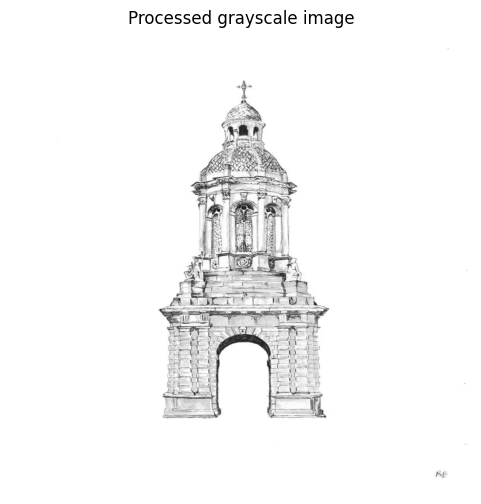

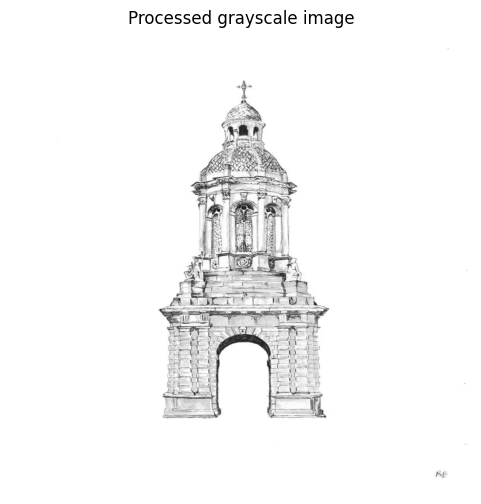

In [ ]:
if __name__ == "__main__":
    L = 1240
    h, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2.jpg.webp", L)

    plt.figure(figsize=(6,6))
    plt.imshow(h, cmap="gray")
    plt.title("Processed grayscale image")
    plt.axis("off")
    plt.show()
    

In [ ]:
'''if __name__ == "__main__":
    L = 100
    h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2.jpg.webp", L, h0=3.0)

    lattice = IsingLattice(L, kT=1.5, h=h_field, initial_state='random')

    # Run dynamics
    lattice.metropolis()

    # Display comparison
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(gray, cmap="gray")
    ax[0].set_title("Original grayscale")
    ax[0].axis("off")

    ax[1].imshow(lattice._spin_array, cmap="gray", vmin=-1, vmax=1)
    ax[1].set_title("Ising steady state")
    ax[1].axis("off")

    plt.tight_layout()
    plt.savefig("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2Ising.jpg.webp")
    plt.show()
'''

'if __name__ == "__main__":\n    L = 100\n    h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2.jpg.webp", L, h0=3.0)\n\n    lattice = IsingLattice(L, kT=1.5, h=h_field, initial_state=\'random\')\n\n    # Run dynamics\n    lattice.metropolis()\n\n    # Display comparison\n    fig, ax = plt.subplots(1, 2, figsize=(10, 5))\n    ax[0].imshow(gray, cmap="gray")\n    ax[0].set_title("Original grayscale")\n    ax[0].axis("off")\n\n    ax[1].imshow(lattice._spin_array, cmap="gray", vmin=-1, vmax=1)\n    ax[1].set_title("Ising steady state")\n    ax[1].axis("off")\n\n    plt.tight_layout()\n    plt.savefig("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2Ising.jpg.webp")\n    plt.show()\n'

In [40]:
'''if __name__ == "__main__":
    L = 50
    h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/University_of_Dublin,_Trinity_College.png", L, h0=3.0)

    lattice = IsingLattice(L, J=0.6, kT=1.8, h=h_field, initial_state='random')

    # Run dynamics
    lattice.metropolis()

    # Display comparison
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(gray, cmap="gray")
    ax[0].set_title("Original grayscale")
    ax[0].axis("off")

    ax[1].imshow(lattice._spin_array, cmap="gray", vmin=-1, vmax=1)
    ax[1].set_title("Ising steady state")
    ax[1].axis("off")

    plt.tight_layout()
    plt.savefig("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2Ising.jpg.webp")
    plt.show()
'''

'if __name__ == "__main__":\n    L = 50\n    h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/University_of_Dublin,_Trinity_College.png", L, h0=3.0)\n\n    lattice = IsingLattice(L, J=0.6, kT=1.8, h=h_field, initial_state=\'random\')\n\n    # Run dynamics\n    lattice.metropolis()\n\n    # Display comparison\n    fig, ax = plt.subplots(1, 2, figsize=(10, 5))\n    ax[0].imshow(gray, cmap="gray")\n    ax[0].set_title("Original grayscale")\n    ax[0].axis("off")\n\n    ax[1].imshow(lattice._spin_array, cmap="gray", vmin=-1, vmax=1)\n    ax[1].set_title("Ising steady state")\n    ax[1].axis("off")\n\n    plt.tight_layout()\n    plt.savefig("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2Ising.jpg.webp")\n    plt.show()\n'

In [41]:
def simulated_annealing(L, T_start=4.0, T_end=0.1, cooling_steps=100, 
                       sweeps_per_temp=100, h=0.0, J=1.0, 
                       initial_state='random', cooling='exponential'):
    """
    Simulated annealing: gradually cool system to find ground state
    
    Parameters:
    -----------
    L : int
        Lattice size
    T_start : float
        Starting (high) temperature
    T_end : float
        Ending (low) temperature
    cooling_steps : int
        Number of temperature steps
    sweeps_per_temp : int
        Monte Carlo sweeps at each temperature
    h : float
        External magnetic field
    J : float
        Coupling constant
    initial_state : str or np.ndarray
        Initial spin configuration
    cooling : str
        Cooling schedule: 'exponential' or 'linear'
        
    Returns:
    --------
    lattice : IsingLattice
        Final annealed lattice
    temp_history : np.ndarray
        Temperature at each step
    energy_history : np.ndarray
        Energy at each step
    mag_history : np.ndarray
        Magnetization at each step
    """
    # Create temperature schedule
    if cooling == 'exponential':
        temp_schedule = np.geomspace(T_start, T_end, cooling_steps)
    elif cooling == 'linear':
        temp_schedule = np.linspace(T_start, T_end, cooling_steps)
    else:
        raise ValueError("cooling must be 'exponential' or 'linear'")
    
    # Initialize lattice at high temperature
    lattice = IsingLattice(L=L, J=J, kT=T_start, h=h, initial_state=initial_state)
    
    # History tracking
    temp_history = []
    energy_history = []
    mag_history = []
    
    print("="*70)
    print("SIMULATED ANNEALING")
    print("="*70)
    print(f"Temperature: {T_start:.2f} → {T_end:.2f}")
    print(f"Magnetic field: h = {h}")
    print(f"Cooling steps: {cooling_steps}")
    print(f"Sweeps per temperature: {sweeps_per_temp}")
    print(f"Cooling schedule: {cooling}")
    print("="*70)
    
    # Annealing loop
    for i, kT in enumerate(temp_schedule):
        # Set temperature
        lattice.set_temperature(kT)
        
        # Equilibrate at this temperature
        for _ in range(sweeps_per_temp):
            lattice.metropolis_step()
        
        # Record observables
        current_energy = lattice.energy()
        current_mag = np.mean(lattice._spin_array)
        
        temp_history.append(float(kT))
        energy_history.append(float(current_energy))
        mag_history.append(float(current_mag))
        
        # Progress report
        if i % max(1, cooling_steps // 10) == 0 or i == 0 or i == cooling_steps - 1:
            progress = (i + 1) / cooling_steps * 100
            print(f"  [{progress:5.1f}%] T = {kT:6.3f}, "
                  f"E = {current_energy:8.1f}, "
                  f"M = {current_mag:6.3f}")
    
    print("="*70)
    print(f"FINAL STATE:")
    print(f"  Temperature: T = {T_end:.3f}")
    print(f"  Energy: E = {energy_history[-1]:.1f}")
    print(f"  Magnetization: M = {mag_history[-1]:.3f}")
    print("="*70)
    
    return (lattice, 
            np.array(temp_history), 
            np.array(energy_history), 
            np.array(mag_history))


def plot_annealing_results(temps, energies, mags, lattice, save_path=None):
    """
    Plot simulated annealing results
    
    Parameters:
    -----------
    temps : array
        Temperature history
    energies : array
        Energy history
    mags : array
        Magnetization history
    lattice : IsingLattice
        Final lattice state
    save_path : str, optional
        Path to save figure
    """
    fig = plt.figure(figsize=(14, 10), dpi=120)
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Plot 1: Temperature schedule
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(temps, 'o-', color='orange', linewidth=2, markersize=4, alpha=0.8)
    ax1.set_ylabel('Temperature $k_BT$', fontsize=12, fontweight='bold')
    ax1.set_title('Cooling Schedule', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.4)
    ax1.set_xlim(0, len(temps)-1)
    
    # Plot 2: Energy evolution
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(energies, 'o-', color='blue', linewidth=2, markersize=4, alpha=0.8)
    ax2.set_ylabel('Energy $E$', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Step', fontsize=12)
    ax2.set_title('Energy Minimization', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.4)
    
    # Plot 3: Magnetization evolution
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(mags, 'o-', color='red', linewidth=2, markersize=4, alpha=0.8)
    ax3.set_ylabel('Magnetization $M$', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Step', fontsize=12)
    ax3.set_title('Magnetization Evolution', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.4)
    
    # Plot 4: Final spin configuration
    ax4 = fig.add_subplot(gs[2, :])
    im = ax4.imshow(lattice._spin_array, cmap='bwr', interpolation='nearest', vmin=-1, vmax=1)
    ax4.set_title(f'Final Spin Configuration (T = {temps[-1]:.3f})', 
                  fontsize=14, fontweight='bold')
    ax4.set_xlabel('x', fontsize=12)
    ax4.set_ylabel('y', fontsize=12)
    cbar = plt.colorbar(im, ax=ax4, label='Spin')
    cbar.set_ticks([-1, 1])
    
    # Overall title
    fig.suptitle(f'Simulated Annealing Results (L={lattice.L}, h={lattice.h})', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"\nPlot saved to: {save_path}")
    
    plt.show()



Example 2: With magnetic field h = 0.5
SIMULATED ANNEALING
Temperature: 4.00 → 0.10
Magnetic field: h = [[3.        3.        3.        ... 3.        3.        3.       ]
 [3.        3.        3.        ... 2.9764705 3.        3.       ]
 [3.        3.        3.        ... 3.        3.        3.       ]
 ...
 [3.        3.        3.        ... 2.8588235 3.        3.       ]
 [3.        3.        3.        ... 2.9058824 3.        3.       ]
 [3.        3.        3.        ... 3.        3.        3.       ]]
Cooling steps: 100
Sweeps per temperature: 100
Cooling schedule: exponential
<class 'numpy.float64'>
  [  1.0%] T =  4.000, E =  -5386.0, M =  0.791
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
  [ 11.0%] T =  2.756, E =  -6623.3, M =  0.938
<class 'numpy.float64'>
<class 'numpy.float64'>
<

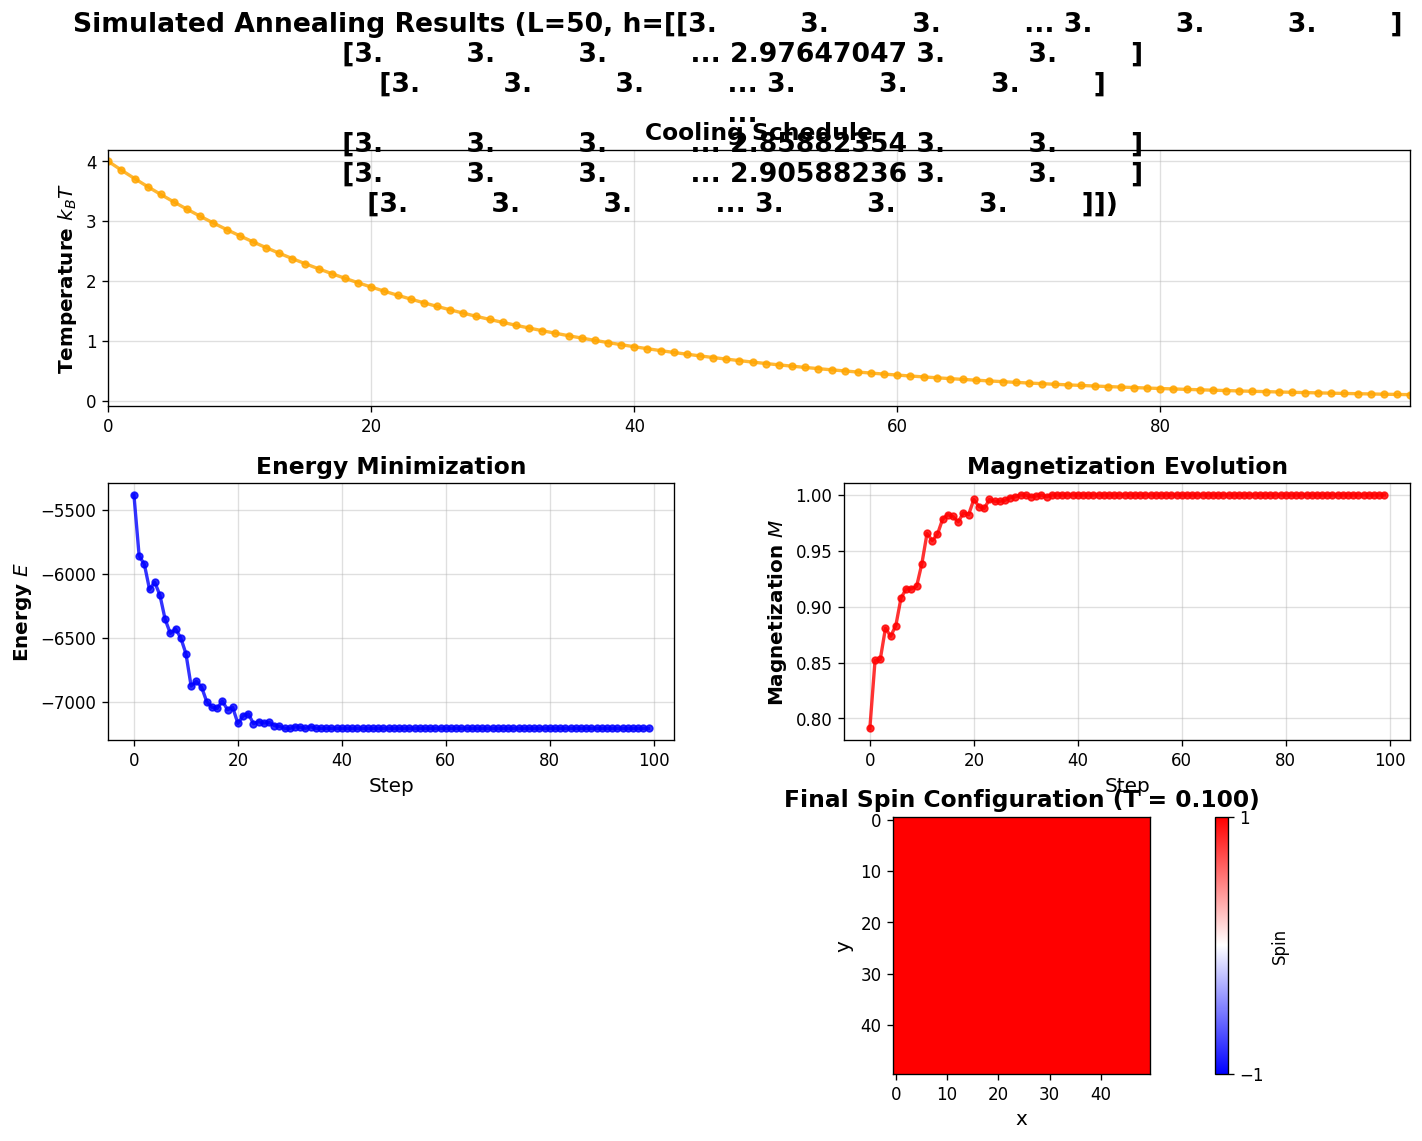

In [44]:
# Example 2: With magnetic field (spins align with field)
print("\n" + "="*70 + "\n")
print("Example 2: With magnetic field h = 0.5")
h_field, gray = load_image("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2.jpg.webp", L=50, h0=3.0)
lattice2, temps2, energies2, mags2 = simulated_annealing(
    L=50,
    T_start=4.0,
    T_end=0.1,
    cooling_steps=100,
    sweeps_per_temp=100,
    h=h_field,  # Positive field favors spin-up
    J=0.6,
    initial_state='random',
    cooling='exponential'
)

plot_annealing_results(temps2, energies2, mags2, lattice2,
                      save_path='annealing_h05.png')



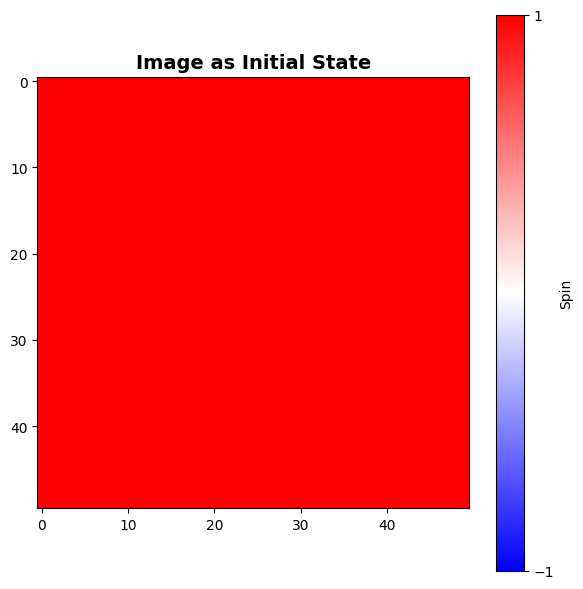

In [57]:
import numpy as np
from PIL import Image

def image_to_spins(image_path, L):
    """
    Load grayscale image and convert to ±1 spins for Ising model
    
    Parameters:
    -----------
    image_path : str
        Path to image file
    L : int
        Lattice size (image will be resized to L×L)
        
    Returns:
    --------
    np.ndarray : L×L array of ±1 values
    """
    # Load and convert to grayscale
    img = Image.open(image_path).convert('L')
    
    # Resize to L×L
    img_resized = img.resize((L, L), Image.LANCZOS)
    img_array = np.array(img_resized)
    
    # Normalize to [-1, 1]
    # Normalize to [0, 1] first
    img_normalized = (img_array - img_array.min()) / (img_array.max() - img_array.min())
    
    # Convert to ±1 spins
    spins = np.where(img_normalized >= 0, 1, -1)
    
    return spins


# Usage
L = 50
initial_spins = image_to_spins('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-2/Lab_3/images/Campanile2.jpg.webp', L)

# Create Ising lattice with image as initial state
lattice = IsingLattice(L=L, initial_state=initial_spins)
lattice.visualize(title="Image as Initial State")

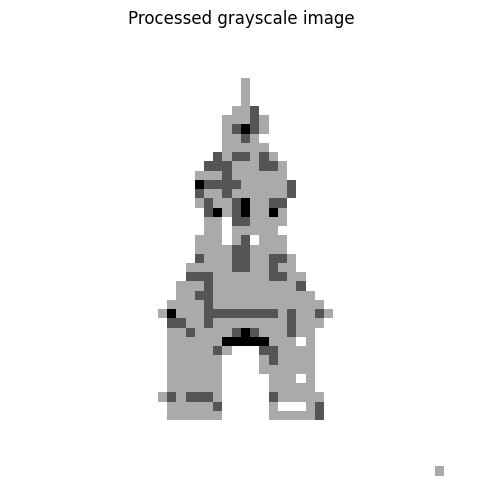

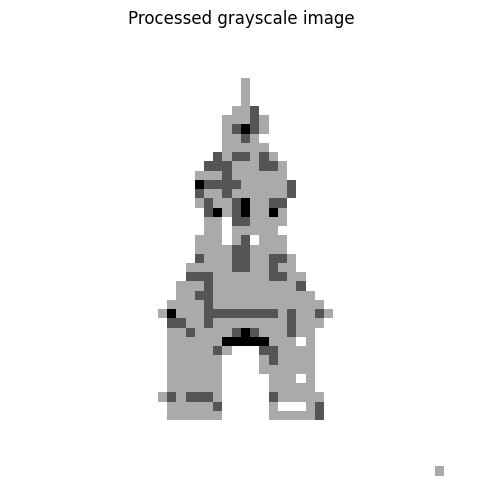

2.81


In [54]:
plt.figure(figsize=(6,6))
plt.imshow(h_field, cmap="gray")
plt.title("Processed grayscale image")
plt.axis("off")
plt.show()

h_field = np.round(h_field)


plt.figure(figsize=(6,6))
plt.imshow(h_field, cmap="gray")
plt.title("Processed grayscale image")
plt.axis("off")
plt.show()

print(np.mean(h_field))